<a href="https://colab.research.google.com/github/isaacbyr/Practice-Projects/blob/main/Pneumonia_CNN.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

I found dataset on kaggle that contains x-ray images of people with and with out pneumonia. The goal of this project is to build a CNN that can predict if a person has pneumonia or not, based on their X-rays. I am going to completly build the CNN by myself and see what accuracy I can acheive. I am going to then look at other most advances peoples codes to this dataset to see if I can also improve upon the accuracy

### Importing the libraries and downloading the dataset

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import cv2
import os

In [2]:
from google.colab import files
files.upload()

Saving kaggle.json to kaggle.json


{'kaggle.json': b'{"username":"isaacbyr","key":"5881667892cb724f4234844a7f6ae768"}'}

In [3]:
!mkdir -p ~/.kaggle
!cp kaggle.json ~/.kaggle/

!chmod 600 ~/.kaggle/kaggle.json

In [4]:
!kaggle datasets download -d paultimothymooney/chest-xray-pneumonia

100% 2.29G/2.29G [00:21<00:00, 124MB/s]
100% 2.29G/2.29G [00:21<00:00, 117MB/s]


In [5]:
!mkdir pneumonia
!mv chest-xray-pneumonia.zip pneumonia

[Errno 2] No such file or directory: 'pnuemonia/'
/content


In [8]:
%cd pneumonia/

/content/pneumonia


In [ ]:
!unzip chest-xray-pneumonia.zip

Looking at the images from the train and test sets

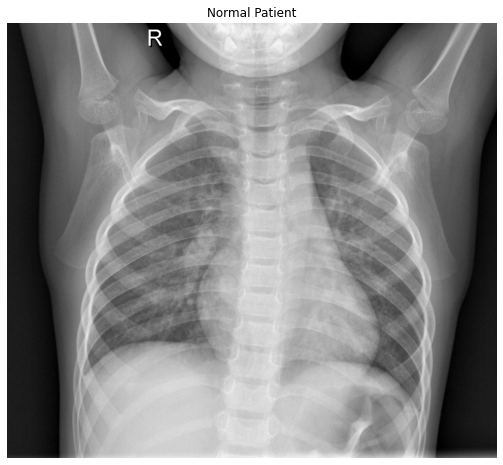

In [17]:
from google.colab.patches import cv2_imshow

img = cv2.imread('/content/pneumonia/chest_xray/train/NORMAL/IM-0115-0001.jpeg')
f, ax = plt.subplots(figsize = (12,8))
plt.imshow(img)
plt.title('Normal Patient')
plt.axis('off')
plt.show()

#the photo below is of a normal patient

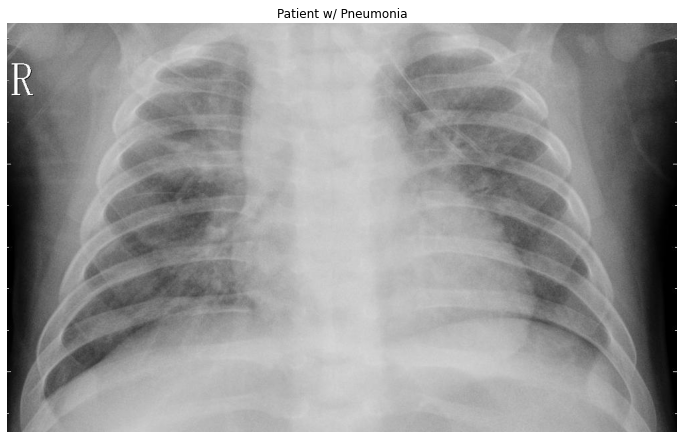

In [60]:
# looking at a patient with pnemonia

img = cv2.imread('/content/pneumonia/chest_xray/train/PNEUMONIA/person1003_virus_1685.jpeg')
plt.subplots(figsize = (12,8))
plt.imshow(img)
plt.title('Patient w/ Pneumonia')
plt.axis('off')
plt.show()

### Loading the data into a train, validation and test set using ImageDataGenerator

In [37]:
from keras_preprocessing.image import ImageDataGenerator

train_datagen = ImageDataGenerator(
    rescale = 1./255,
    shear_range = 0.2,
    zoom_range = 0.2,
    horizontal_flip = True
)

train_set = train_datagen.flow_from_directory('/content/pneumonia/chest_xray/train',
                                              target_size = (64,64), batch_size = 32,
                                              class_mode = 'binary')

validation_datagen = ImageDataGenerator(
    rescale = 1./255,
    shear_range = 0.2,
    zoom_range = 0.2,
    horizontal_flip = True
)

validation_set = validation_datagen.flow_from_directory('/content/pneumonia/chest_xray/val',
                                                        target_size = (64,64), batch_size = 32,
                                                        class_mode = 'binary')


test_datagen = ImageDataGenerator(rescale = 1./255)

test_set = test_datagen.flow_from_directory('/content/pneumonia/chest_xray/test',
                                            target_size = (64,64), batch_size = 32,
                                            class_mode = 'binary')

Found 5216 images belonging to 2 classes.
Found 16 images belonging to 2 classes.
Found 624 images belonging to 2 classes.


### Building, Compoiling and fitting the Model

In [62]:
from keras.models import Sequential
from keras.layers import Dense
from keras.layers import Convolution2D
from keras.layers import Flatten
from keras.layers import MaxPool2D
from keras.layers import BatchNormalization
from keras import regularizers

In [72]:
model = Sequential()

model.add(Convolution2D(filters=32, kernel_size = (3,3), strides = 1, padding='same', input_shape = (64,64,3),
                        activation = 'relu'))
model.add(MaxPool2D(pool_size= (2,2), strides = 2))
model.add(BatchNormalization())
model.add(Convolution2D(filters=64, kernel_size=(3,3), strides=1, activation = 'relu', padding='same'))
model.add(MaxPool2D(pool_size= (2,2), strides = 2))

model.add(Flatten())
model.add(Dense(units = 128, activation = 'relu'))
model.add(Dense(units = 1, activation = 'sigmoid'))

In [44]:
model.summary()

Model: "sequential_2"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_4 (Conv2D)            (None, 64, 64, 32)        896       
_________________________________________________________________
max_pooling2d_4 (MaxPooling2 (None, 32, 32, 32)        0         
_________________________________________________________________
batch_normalization_2 (Batch (None, 32, 32, 32)        128       
_________________________________________________________________
conv2d_5 (Conv2D)            (None, 32, 32, 32)        9248      
_________________________________________________________________
max_pooling2d_5 (MaxPooling2 (None, 16, 16, 32)        0         
_________________________________________________________________
flatten_2 (Flatten)          (None, 8192)              0         
_________________________________________________________________
dense_3 (Dense)              (None, 128)              

In [73]:
model.compile(optimizer = 'adam', loss='binary_crossentropy', metrics=['accuracy'])

In [74]:
batch_size=32
model.fit_generator(train_set, epochs = 2,
                    validation_data =validation_set)

/usr/local/lib/python3.6/dist-packages/tensorflow/python/keras/engine/training.py:1844: UserWarning: `Model.fit_generator` is deprecated and will be removed in a future version. Please use `Model.fit`, which supports generators.
  warnings.warn('`Model.fit_generator` is deprecated and '


Epoch 1/2
163/163 [==============================] - 86s 524ms/step - loss: 0.5662 - accuracy: 0.8130 - val_loss: 0.7135 - val_accuracy: 0.6250
Epoch 2/2
163/163 [==============================] - 84s 516ms/step - loss: 0.1806 - accuracy: 0.9309 - val_loss: 0.8594 - val_accuracy: 0.6250


#### Making a Predicting on the test set

In [75]:
test_acc = model.evaluate_generator(test_set)

/usr/local/lib/python3.6/dist-packages/tensorflow/python/keras/engine/training.py:1877: UserWarning: `Model.evaluate_generator` is deprecated and will be removed in a future version. Please use `Model.evaluate`, which supports generators.
  warnings.warn('`Model.evaluate_generator` is deprecated and '


In [76]:
print('Test accuracy: ' , test_acc[1]*100, '%')

Test accuracy:  83.65384340286255 %


Looks like we got 84% accuracy! I am very pleased by this. This is the first time I have completly built a CNN from scratch by myself. I had to google a couple little things but thats almost always the case. In all honesty when I look through the dataset I even have a hard time making a depiction between the two classes sometimes so, I am very happy with 84% accuracy

Now I am going to look at a couple other peoples notebooks regarding this dataset to see if I can try and improve my accuracy.

In [106]:
from keras.layers import Dropout
tester = Sequential()

tester.add(Convolution2D(filters=32, kernel_size = (3,3), strides = 1, activation = 'relu',
                         input_shape = (64,64,3), padding = 'same'))
tester.add(Dropout(0.1))
tester.add(MaxPool2D(pool_size=(2,2), strides=2))

tester.add(Convolution2D(filters=64, kernel_size = (3,3), strides = 1, activation = 'relu', padding = 'same'))
tester.add(Dropout(0.2))
tester.add(MaxPool2D(pool_size=(2,2), strides=2))

tester.add(Flatten())
tester.add(Dense(units = 128, activation = 'relu'))
tester.add(Dense(units = 1, activation='sigmoid'))


In [108]:
tester.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])

In [97]:
tester.fit_generator(train_set, epochs = 4, validation_data= validation_set)

/usr/local/lib/python3.6/dist-packages/tensorflow/python/keras/engine/training.py:1844: UserWarning: `Model.fit_generator` is deprecated and will be removed in a future version. Please use `Model.fit`, which supports generators.
  warnings.warn('`Model.fit_generator` is deprecated and '


Epoch 1/4
163/163 [==============================] - 105s 636ms/step - loss: 0.4771 - accuracy: 0.7704 - val_loss: 0.4318 - val_accuracy: 0.8750
Epoch 2/4
163/163 [==============================] - 105s 643ms/step - loss: 0.2684 - accuracy: 0.8835 - val_loss: 1.3417 - val_accuracy: 0.6250
Epoch 3/4
163/163 [==============================] - 104s 639ms/step - loss: 0.2094 - accuracy: 0.9159 - val_loss: 0.8162 - val_accuracy: 0.6875
Epoch 4/4
163/163 [==============================] - 104s 635ms/step - loss: 0.1921 - accuracy: 0.9266 - val_loss: 0.6505 - val_accuracy: 0.7500


In [98]:
acc = tester.evaluate_generator(test_set)

/usr/local/lib/python3.6/dist-packages/tensorflow/python/keras/engine/training.py:1877: UserWarning: `Model.evaluate_generator` is deprecated and will be removed in a future version. Please use `Model.evaluate`, which supports generators.
  warnings.warn('`Model.evaluate_generator` is deprecated and '


In [100]:
print('Loss of model: ', acc[0])
print('Test accuracy: ' , acc[1]*100, '%')

Loss of model:  0.36214548349380493
Test accuracy:  88.30128312110901 %


Perfect! After quite a bit of tweaking and rerunning and adding dropout regularization to my model I was able to increase accuracy to 88%. I am very excited about that. In the deep learning course I took they said to never evaluate on the test set until you have your 'production' model and I did run on my test set so hopefully I didnt mess anything up

In [109]:
history = tester.fit_generator(train_set, epochs = 4, validation_data= validation_set)

/usr/local/lib/python3.6/dist-packages/tensorflow/python/keras/engine/training.py:1844: UserWarning: `Model.fit_generator` is deprecated and will be removed in a future version. Please use `Model.fit`, which supports generators.
  warnings.warn('`Model.fit_generator` is deprecated and '


Epoch 1/4
163/163 [==============================] - 96s 587ms/step - loss: 0.4845 - accuracy: 0.7842 - val_loss: 0.9241 - val_accuracy: 0.5625
Epoch 2/4
163/163 [==============================] - 98s 602ms/step - loss: 0.2141 - accuracy: 0.9177 - val_loss: 0.8276 - val_accuracy: 0.6875
Epoch 3/4
163/163 [==============================] - 96s 590ms/step - loss: 0.1897 - accuracy: 0.9200 - val_loss: 0.5456 - val_accuracy: 0.7500
Epoch 4/4
163/163 [==============================] - 95s 584ms/step - loss: 0.1650 - accuracy: 0.9370 - val_loss: 0.5179 - val_accuracy: 0.8125


In [110]:
acc = tester.evaluate_generator(test_set)

/usr/local/lib/python3.6/dist-packages/tensorflow/python/keras/engine/training.py:1877: UserWarning: `Model.evaluate_generator` is deprecated and will be removed in a future version. Please use `Model.evaluate`, which supports generators.
  warnings.warn('`Model.evaluate_generator` is deprecated and '


#### Plotting train/validation loss and accuracy

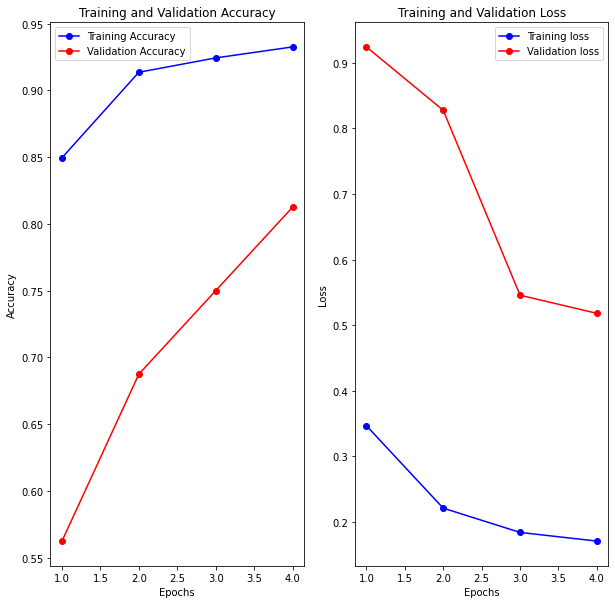

In [162]:
epochs = np.arange(1,5)

f, ax = plt.subplots(1,2, figsize = (10,10))

train_acc = history.history['accuracy']
train_loss = history.history['loss']
val_acc = history.history['val_accuracy']
val_loss = history.history['val_loss']

ax[0].plot(epochs, train_acc, 'bo-', label = 'Training Accuracy')
ax[0].plot(epochs, val_acc, 'ro-', label = 'Validation Accuracy')
ax[0].legend()
ax[0].set_xlabel('Epochs')
ax[0].set_ylabel('Accuracy')
ax[0].set_title('Training and Validation Accuracy')

ax[1].plot(epochs, train_loss, 'bo-', label = 'Training loss')
ax[1].plot(epochs, val_loss, 'ro-', label = 'Validation loss')
ax[1].legend()
ax[1].set_xlabel('Epochs')
ax[1].set_ylabel('Loss')
ax[1].set_title('Training and Validation Loss')

plt.show()